In [121]:
# Imports here
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import pickle
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

ModuleNotFoundError: No module named 'monai'

In [123]:
DATADIR = "data/train"
CATEGORIES = ["NORMAL", "COVID-19"]

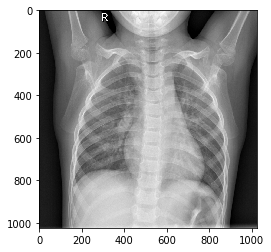

In [124]:
for category in CATEGORIES:  # do normal CXR images and covid-19 CXR images 
    path = os.path.join(DATADIR,category)  # create path to normal and covid-19
    for img in os.listdir(path):  # iterate over each image normal and covid-19
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

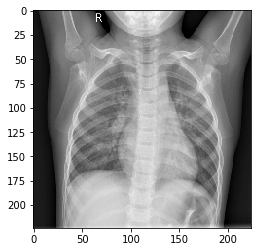

In [126]:
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [127]:
def make_training_data():
    training_data = []
    IMG_SIZE = 80
    for category in CATEGORIES:  # do normal and covid-19 CXR images

        path = os.path.join(DATADIR,category)  # create path to normal and covid-19 images
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=normal 1=covid-19

        for img in tqdm(os.listdir(path)):  # iterate over each image per normal and covid-19
            #try:
                img = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                training_data.append([np.array(img), class_num])
    return training_data

In [128]:
imagesAndLabels = make_training_data()
imagesAndLabels = imagesAndLabels
# now shuffle this data so that normal and covid-19 X-ray images are scattered in the dataset
from numpy.random import shuffle
shuffle(imagesAndLabels)

100%|███████████████████████████████████████████████████████████████████████████████| 219/219 [00:04<00:00, 51.74it/s]


In [129]:
len(imagesAndLabels)

1560

In [130]:
type(imagesAndLabels)

list

In [131]:
for sample in imagesAndLabels[:10]:
    print(sample[1])

0
0
1
0
1
0
0
1
0
1


In [132]:
X = []
y = []
IMG_SIZE=80
for features,label in imagesAndLabels:
    X.append(features)
    y.append(label)

print(X[0].reshape(IMG_SIZE, IMG_SIZE, 1))
set(y)

[[[  0]
  [146]
  [154]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [133]
  [149]
  ...
  [127]
  [112]
  [ 87]]

 [[  0]
  [136]
  [148]
  ...
  [126]
  [108]
  [ 82]]

 ...

 [[170]
  [167]
  [167]
  ...
  [ 61]
  [ 59]
  [  0]]

 [[215]
  [210]
  [210]
  ...
  [ 86]
  [ 87]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [140]
  [143]
  [  0]]]


{0, 1}

In [133]:
X[0]

array([[  0, 146, 154, ...,   0,   0,   0],
       [  0, 133, 149, ..., 127, 112,  87],
       [  0, 136, 148, ..., 126, 108,  82],
       ...,
       [170, 167, 167, ...,  61,  59,   0],
       [215, 210, 210, ...,  86,  87,   0],
       [  0,   0,   0, ..., 140, 143,   0]], dtype=uint8)

In [134]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [135]:
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [136]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [138]:
(X_train,X_test,y_train,y_test) = train_test_split(X, y,test_size = 0.1,random_state=0)

In [139]:
X_train = torch.Tensor(X_train).view(-1, 80, 80)
X_test = torch.Tensor(X_train).view(-1, 80, 80)
X_train = X_train/255.0
X_test = X_test/255.0

y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

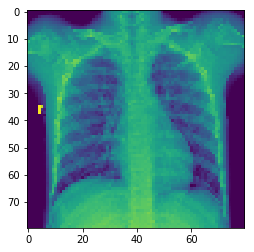

In [140]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].view( 80,80))

In [157]:
X_train_transform = transforms.Compose([transforms.RandomRotation(30),
                              transforms.RandomResizedCrop(224), 
                              transforms.RandomHorizontalFlip(), 
                              transforms.ToTensor(), 
                              transforms.Normalize([0.485, 0.456, 0.406], 
                                                   [0.229, 0.224, 0.225])])


X_test_transform = transforms.Compose([transforms.Resize(256), 
                             transforms.CenterCrop(224), 
                             transforms.ToTensor(), 
                             transforms.Normalize([0.485, 0.456, 0.406],
                                                  [0.229, 0.224, 0.225])])

In [161]:
X_train

Compose(
    RandomRotation(degrees=(-30, 30), resample=False, expand=False)
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)